In [1585]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1586]:
data=pd.read_csv('student-data.csv')

In [1587]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [1588]:
data.shape

(395, 31)

In [1589]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [1590]:
#Missing values
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [1591]:
#Pre-Processing
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [1592]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

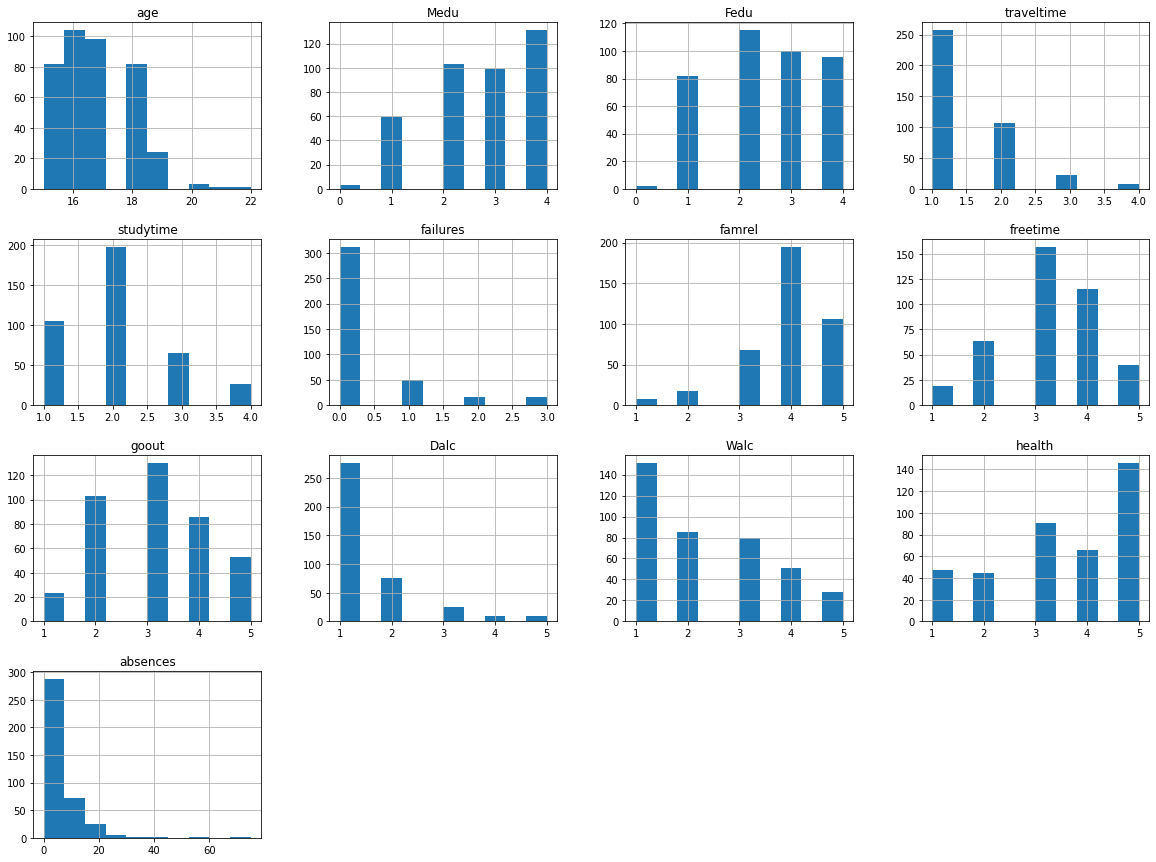

In [1593]:
fregraph=data.select_dtypes(include=["int64"])
fregraph.hist(figsize=(20,15))
plt.show()

In [1594]:
#dropping columns
x=data.drop(['sex', 'age', 'address', 'famsize','guardian','nursery','romantic','school'],axis=1)

In [1595]:
x['passed_e']=label_en.fit_transform(x['passed'])

In [1596]:
x=x.drop(['passed'],axis=1)

In [1597]:
#value count
x['Mjob'].value_counts()

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64

In [1598]:
x['Fjob'].value_counts()

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64

In [1599]:
x['reason'].value_counts()

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64

# Encoding

In [1600]:
# Perform label Encoding
# encoding Mjob
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Mjob']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1601]:
# Encoding Fjob
a=['Fjob']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1602]:
# Encoding Reason
a=['reason']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1603]:
# One Hot Encoding 
# Encoding Pstatus

Pstatus_en=pd.get_dummies(x['Pstatus'])

In [1604]:
x=pd.concat([x,Pstatus_en],axis=1)

In [1605]:
x=x.drop(['Pstatus'],axis=1)

# Feature Engineering

In [1606]:
#Combining mothers n fathers education

x['Parent_edu']=x['Medu']+x['Fedu']

In [1607]:
x=x.drop(['Medu','Fedu'],axis=1)

In [1608]:
#Combining Dalc and Walc

x['Alcohol']=x['Dalc']+x['Walc']

In [1609]:
x=x.drop(['Dalc','Walc'],axis=1)

In [1610]:
#Combining Freetime and go out

x['Freetime']=x['freetime']+x['goout']

In [1611]:
x=x.drop(['freetime','goout'],axis=1)

In [1612]:
x['fams']=label_en.fit_transform(x['famsup'])

In [1613]:
x['schoolup_en']=label_en.fit_transform(x['schoolsup'])
x['paid_en']=label_en.fit_transform(x['paid'])
x['activity_en']=label_en.fit_transform(x['activities'])
x['higher_en']=label_en.fit_transform(x['higher'])
x['internet_en']=label_en.fit_transform(x['internet'])

In [1614]:
x=x.drop(['schoolsup','paid','activities','higher','internet','famsup'],axis=1)

In [1615]:
x.shape

(395, 21)

In [1616]:
x

,Mjob,Fjob,reason,traveltime,studytime,failures,famrel,health,absences,passed_e,...,T,Parent_edu,Alcohol,Freetime,fams,schoolup_en,paid_en,activity_en,higher_en,internet_en
0,0,4,0,2,2,0,4,3,6,0,...,0,8,2,7,0,1,0,0,1,0
1,0,2,0,1,2,0,5,3,4,0,...,1,2,2,6,1,0,0,0,1,1
2,0,2,2,1,2,3,4,3,10,1,...,1,2,5,5,0,1,1,0,1,1
3,1,3,1,1,3,0,3,5,2,1,...,1,6,2,4,1,0,1,1,1,1
4,2,2,1,1,2,0,4,5,4,1,...,1,6,3,5,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,3,3,0,1,2,2,5,4,11,0,...,0,4,9,9,1,0,1,0,1,0
391,3,3,0,2,1,0,2,2,3,1,...,1,4,7,9,0,0,0,0,1,1
392,2,2,0,1,1,3,5,3,3,0,...,1,2,6,8,0,0,0,0,1,0
393,3,2,0,3,1,0,4,5,0,1,...,1,5,7,5,0,0,0,0,1,1


In [1617]:
y=pd.DataFrame(x['passed_e'])

In [1618]:
x=x.drop(['passed_e'],axis=1)

In [1619]:
#Splitting the data
from sklearn.model_selection import train_test_split

In [1620]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [1621]:
x_train.shape

(276, 20)

In [1622]:
y_train.shape

(276, 1)

In [1623]:
x_test.shape

(119, 20)

In [1624]:
y_test.shape

(119, 1)

# Modelling

# Logistic Regression

In [1625]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

In [1626]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.7226890756302521
f1 score is: 0.8176795580110497
Precision is: 0.7326732673267327
Recall is: 0.925


In [1627]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[12, 27],
       [ 6, 74]])

# Random Forest Classifier

In [1628]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [1629]:
y_pred=rf.predict(x_test)

In [1630]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.6974789915966386
f1 score is: 0.7999999999999999
Precision is: 0.72
Recall is: 0.9


In [1631]:
confusion_matrix(y_test,y_pred)

array([[11, 28],
       [ 8, 72]])

# KNN

In [1632]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [1633]:
acc_values

[0.6638655462184874,
 0.6302521008403361,
 0.680672268907563,
 0.6974789915966386,
 0.7142857142857143,
 0.6890756302521008,
 0.7226890756302521,
 0.7058823529411765,
 0.6974789915966386,
 0.6890756302521008,
 0.6722689075630253,
 0.6638655462184874]

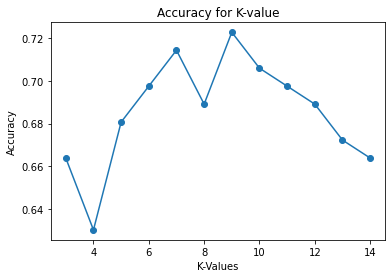

In [1634]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()


In [1635]:
classifier= KNeighborsClassifier(n_neighbors=9,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [1636]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.6974789915966386
f1 score is: 0.7999999999999999
Precision is: 0.72
Recall is: 0.9


In [1637]:
confusion_matrix(y_test,y_pred)

array([[11, 28],
       [ 8, 72]])